<a href="https://colab.research.google.com/github/baroneleonardo/NO2-Virtual-Sensor/blob/main/ML_project_dataexpl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [50]:
# Load the CSV file
data = pd.read_excel("AirQualityUCI.xlsx")

In [51]:
data 

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [53]:
# We decide to drop all the Ground Truth concentration values and keep only the resistivity values registred by the sensors
data.drop(['CO(GT)','C6H6(GT)', 'NMHC(GT)','NOx(GT)','PT08.S4(NO2)'], axis = 1, inplace = True)

In [55]:
data

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,1360.00,1045.50,1056.25,113.0,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,1292.25,954.75,1173.75,92.0,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,1402.00,939.25,1140.00,114.0,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,1375.50,948.25,1092.00,122.0,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1272.25,835.50,1205.00,116.0,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,1314.25,1101.25,538.50,189.8,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,1162.50,1027.00,603.75,179.2,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,1142.00,1062.50,603.25,174.7,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,1002.50,960.50,701.50,155.7,769.75,28.325,13.550000,0.513866


In [56]:
# We replace the values equal to -200 with NaN
data.replace(to_replace=-200,value=np.nan,inplace=True) 

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   PT08.S1(CO)    8991 non-null   float64       
 3   PT08.S2(NMHC)  8991 non-null   float64       
 4   PT08.S3(NOx)   8991 non-null   float64       
 5   NO2(GT)        7715 non-null   float64       
 6   PT08.S5(O3)    8991 non-null   float64       
 7   T              8991 non-null   float64       
 8   RH             8991 non-null   float64       
 9   AH             8991 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 731.1+ KB


In [58]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time
data['Datetime'] = pd.to_datetime(data['Date'].dt.date.astype(str) + ' ' + data['Time'].astype(str))
data.drop(['Date', 'Time'], axis = 1, inplace = True)

In [59]:
# Convert the date column to a datetime object
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Set the date column as the index of the DataFrame
data = data.set_index('Datetime')

In [60]:
data

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,
2004-03-10 18:00:00,1360.00,1045.50,1056.25,113.0,1267.50,13.600,48.875001,0.757754
2004-03-10 19:00:00,1292.25,954.75,1173.75,92.0,972.25,13.300,47.700000,0.725487
2004-03-10 20:00:00,1402.00,939.25,1140.00,114.0,1074.00,11.900,53.975000,0.750239
2004-03-10 21:00:00,1375.50,948.25,1092.00,122.0,1203.25,11.000,60.000000,0.786713
2004-03-10 22:00:00,1272.25,835.50,1205.00,116.0,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,1314.25,1101.25,538.50,189.8,1728.50,21.850,29.250000,0.756824
2005-04-04 11:00:00,1162.50,1027.00,603.75,179.2,1269.00,24.325,23.725000,0.711864
2005-04-04 12:00:00,1142.00,1062.50,603.25,174.7,1092.00,26.900,18.350000,0.640649


In [61]:
data.to_excel('data_dausare.xlsx', index=True) #bea sono questi i dati da usare giusto?

In [62]:
data.dropna(subset=['NO2(GT)'], inplace=True) #tolgo i dati senza risposta concentrazione NO2

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7715 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PT08.S1(CO)    7393 non-null   float64
 1   PT08.S2(NMHC)  7393 non-null   float64
 2   PT08.S3(NOx)   7393 non-null   float64
 3   NO2(GT)        7715 non-null   float64
 4   PT08.S5(O3)    7393 non-null   float64
 5   T              7393 non-null   float64
 6   RH             7393 non-null   float64
 7   AH             7393 non-null   float64
dtypes: float64(8)
memory usage: 542.5 KB


In [65]:
# there are still Nan values
# two dataset:
# - filling with the mean
# - dropping the reaming nan values

data_drop = data.dropna()

data_mean = data.fillna(data.mean())

In [66]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7393 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PT08.S1(CO)    7393 non-null   float64
 1   PT08.S2(NMHC)  7393 non-null   float64
 2   PT08.S3(NOx)   7393 non-null   float64
 3   NO2(GT)        7393 non-null   float64
 4   PT08.S5(O3)    7393 non-null   float64
 5   T              7393 non-null   float64
 6   RH             7393 non-null   float64
 7   AH             7393 non-null   float64
dtypes: float64(8)
memory usage: 519.8 KB


In [67]:
data_mean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7715 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PT08.S1(CO)    7715 non-null   float64
 1   PT08.S2(NMHC)  7715 non-null   float64
 2   PT08.S3(NOx)   7715 non-null   float64
 3   NO2(GT)        7715 non-null   float64
 4   PT08.S5(O3)    7715 non-null   float64
 5   T              7715 non-null   float64
 6   RH             7715 non-null   float64
 7   AH             7715 non-null   float64
dtypes: float64(8)
memory usage: 542.5 KB


In [70]:
mean_values = data_drop.mean() 
#mean_values = data_mean.mean() it's the same
print(mean_values)

PT08.S1(CO)      1111.994511
PT08.S2(NMHC)     950.533117
PT08.S3(NOx)      824.452117
NO2(GT)           112.129974
PT08.S5(O3)      1045.593388
T                  17.962874
RH                 48.773557
AH                  0.994757
dtype: float64


In [ ]:
# mean of data
mean_values = data_mean.mean()
print(mean_values)

PT08.S1(CO)      1111.994511
PT08.S2(NMHC)     950.533117
PT08.S3(NOx)      824.452117
NO2(GT)           112.129974
PT08.S5(O3)      1045.593388
T                  17.962874
RH                 48.773557
AH                  0.994757
dtype: float64


In [72]:
data_drop.describe()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S5(O3),T,RH,AH
count,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000
mean,1111.994511,950.533117,824.452117,112.129974,1045.593388,17.962874,48.773557,0.994757
std,218.283725,265.446325,256.934144,47.618852,405.881021,9.001704,17.494708,0.403659
min,647.250000,383.250000,322.000000,2.000000,221.000000,-1.900000,9.175000,0.184679
25%,949.500000,749.250000,648.500000,77.000000,748.000000,11.275000,35.124999,0.699130
50%,1077.750000,925.000000,791.500000,108.500000,990.750000,17.100000,48.999999,0.964687
75%,1246.250000,1127.500000,954.500000,140.000000,1307.250000,24.050000,62.175000,1.271086
max,2039.750000,2214.000000,2682.750000,332.600000,2522.750000,44.600000,88.725000,2.180639


In [73]:
data_mean.describe()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S5(O3),T,RH,AH
count,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000
mean,1111.994511,950.533117,824.452117,113.075515,1045.593388,17.962874,48.773557,0.994757
std,213.679333,259.847103,251.514474,48.359250,397.319524,8.811826,17.125681,0.395144
min,647.250000,383.250000,322.000000,2.000000,221.000000,-1.900000,9.175000,0.184679
25%,955.500000,758.625000,655.375000,78.000000,760.500000,11.550000,35.750000,0.714983
50%,1089.250000,939.500000,801.500000,109.000000,1013.250000,17.675000,48.773557,0.987521
75%,1235.500000,1119.750000,944.000000,142.000000,1290.125000,23.750000,61.600000,1.254426
max,2039.750000,2214.000000,2682.750000,339.700000,2522.750000,44.600000,88.725000,2.180639


In [76]:
# Identify and highlight outliers using the z-score method

threshold = 3 # theshold a little high to retain some outliers
z_scores = np.abs(stats.zscore(data_drop.select_dtypes(include=[np.number])))
outliers = (z_scores > threshold).any(axis=1)
np.sum(outliers)
outliers #for identifying the outliers

Datetime
2004-03-10 18:00:00    False
2004-03-10 19:00:00    False
2004-03-10 20:00:00    False
2004-03-10 21:00:00    False
2004-03-10 22:00:00    False
                       ...  
2005-04-04 10:00:00    False
2005-04-04 11:00:00    False
2005-04-04 12:00:00    False
2005-04-04 13:00:00    False
2005-04-04 14:00:00    False
Length: 7393, dtype: bool

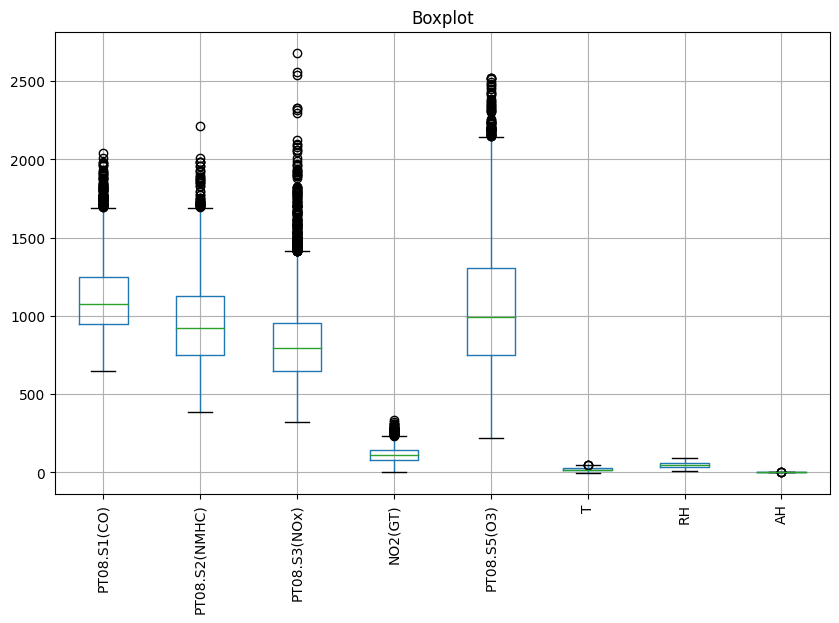

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 
# boxplots for outliers detection 
data_drop.boxplot()
plt.title('Boxplot')  
plt.xticks(range(1, len(data_drop.columns) + 1), data_drop.columns, rotation=90)  

plt.show() # TODO: drop outliers using interquantile distance

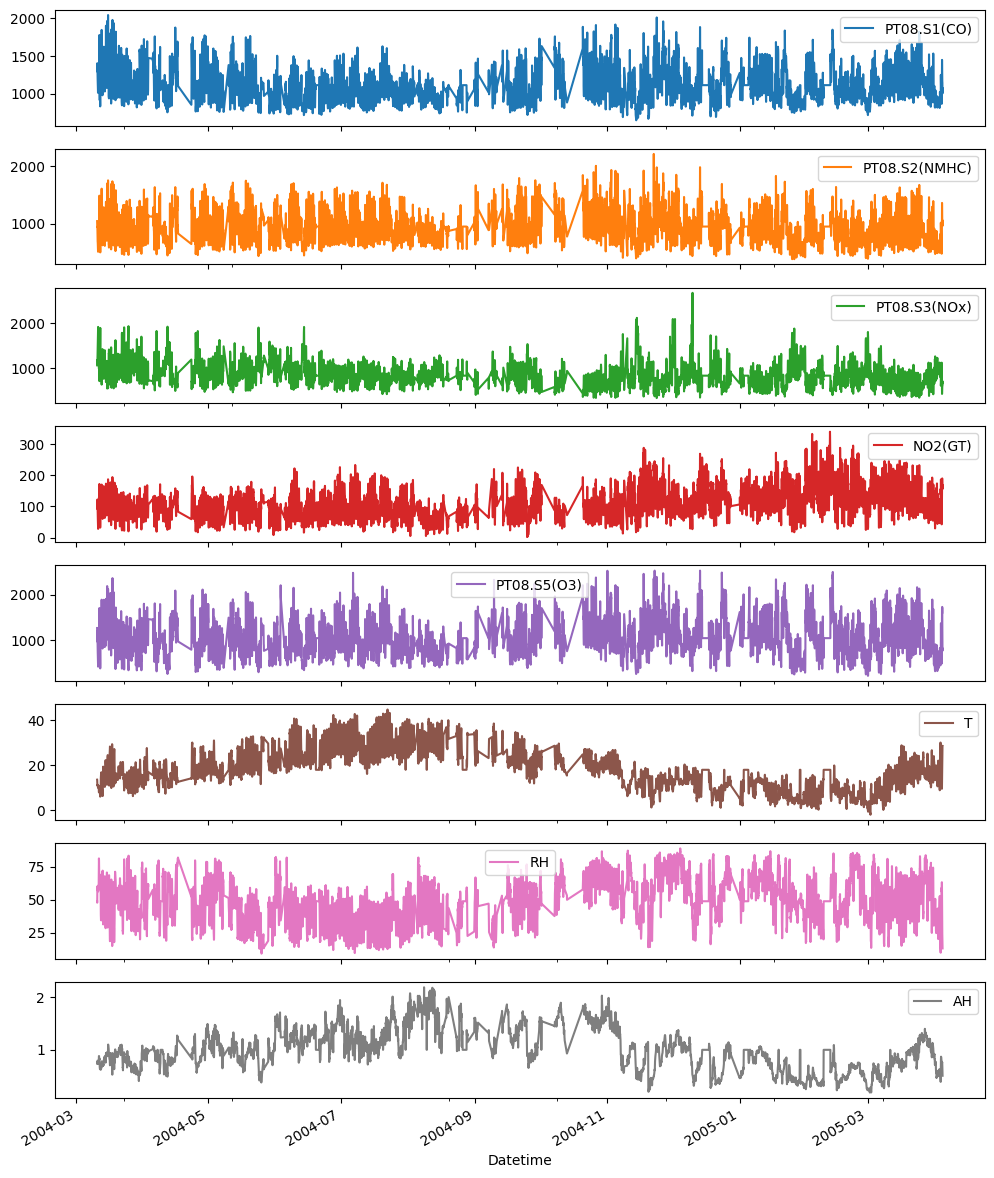

In [81]:
data_mean.plot(subplots=True, figsize=(12, 16))
plt.show()

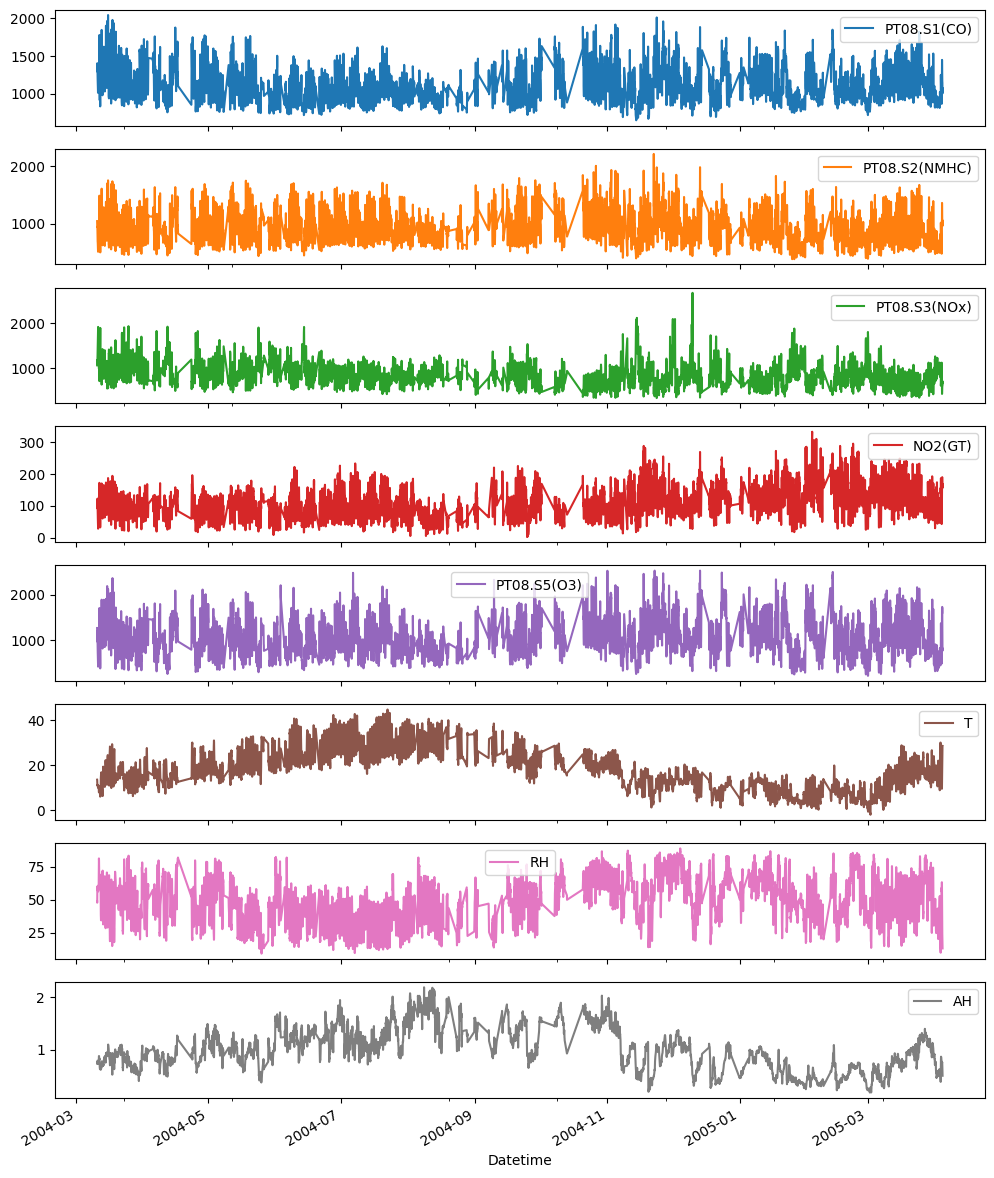

In [82]:
data_drop.plot(subplots=True, figsize=(12, 16))
plt.show()

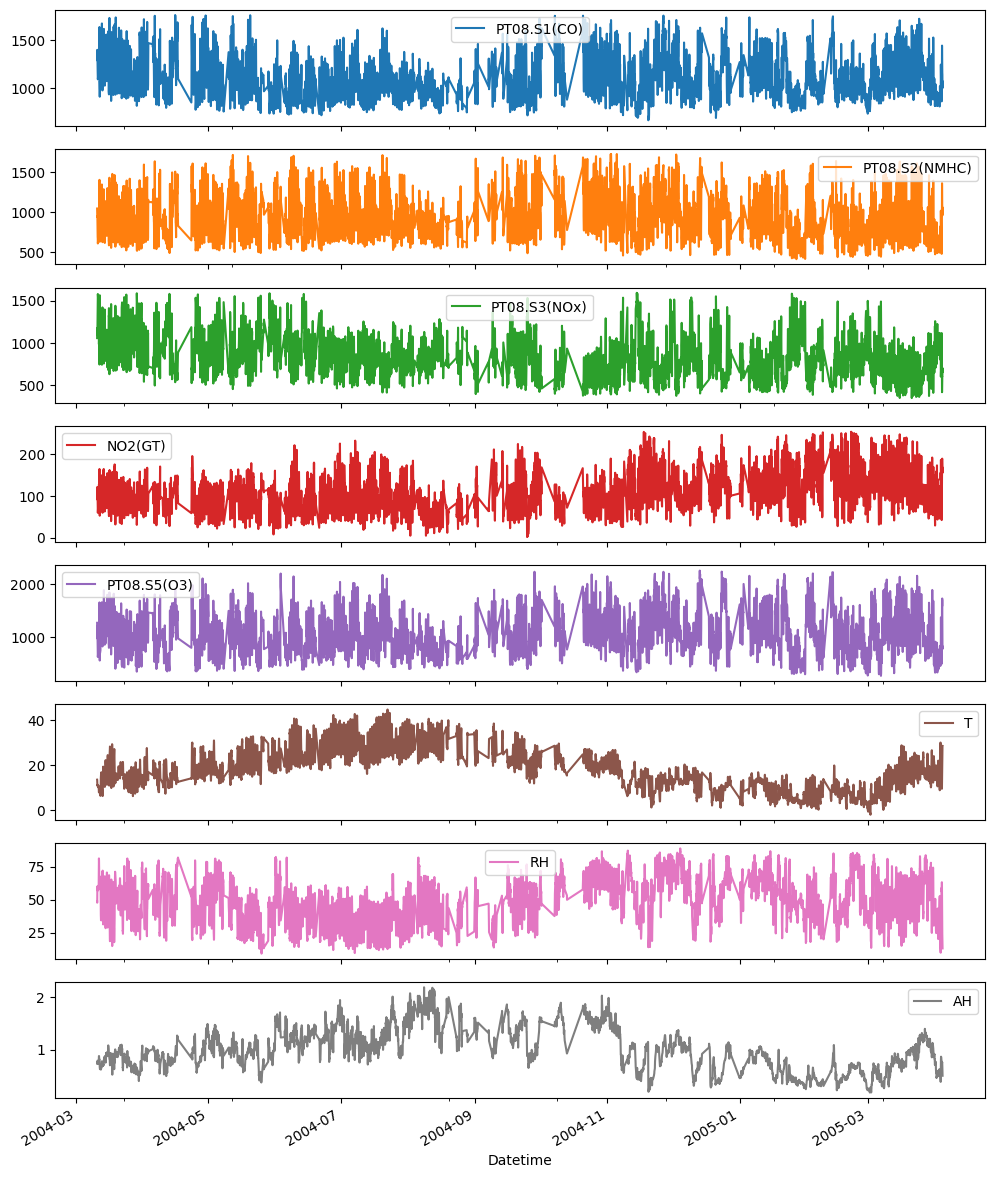

In [84]:
# We remove outliers from the dataset, the plots are note very diffirent
data_wo = data_drop.loc[~outliers]
data_wo.plot(subplots=True, figsize=(12, 16))
plt.show()

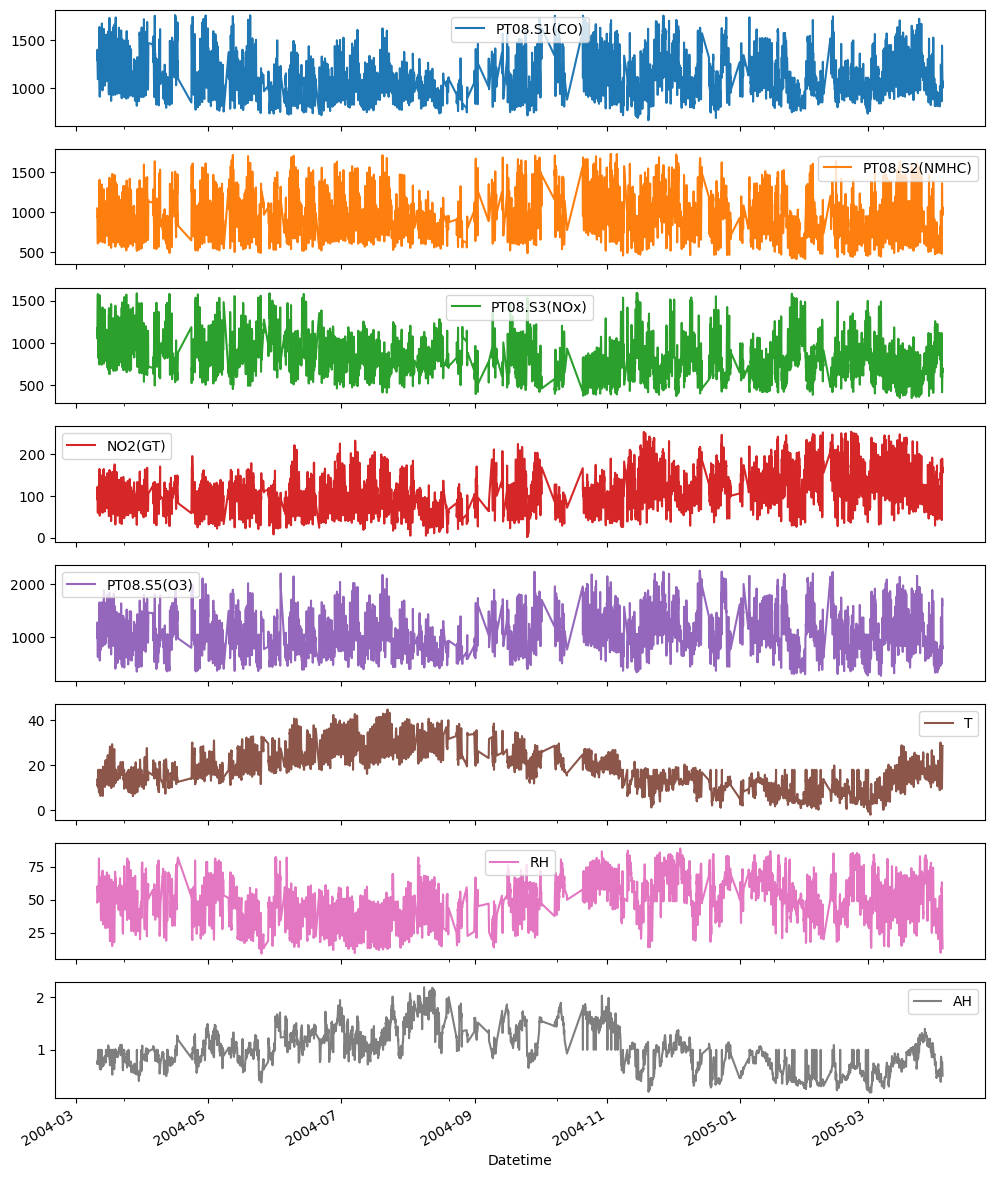

In [ ]:
# We fill the outlier values with the mean of each column

#for column in data_mean.columns:
#    column_mean = data_mean[column].mean()
#    data_mean.loc[outliers, column] = column_mean
#data_mean.plot(subplots=True, figsize=(12, 16))
#plt.show()

In [91]:
# Count the number of unique hours for each date
hours_per_day = data_mean.groupby(data_mean.index.date).size()

print(hours_per_day)

# Get the dates that have less than 24 unique hours
incomplete_days = hours_per_day[hours_per_day < 24].index

print(incomplete_days)

# Convert the incomplete_days array to a DatetimeIndex
date_index = pd.DatetimeIndex(data_mean.index.date)

# Filter the DataFrame to exclude the rows corresponding to incomplete days
data_complete_days = data_mean[~date_index.isin(incomplete_days)]

data_incomplete_days = data_mean[date_index.isin(incomplete_days)]

2004-03-10    24
2004-03-11    24
2004-03-12    24
2004-03-13    24
2004-03-14    24
              ..
2005-03-31    24
2005-04-01    24
2005-04-02    24
2005-04-03    24
2005-04-04    24
Length: 357, dtype: int64
Index([], dtype='object')


In [87]:
# We fill with the mean the days that don't have 24 observations for future application of LSTM
# we don't know if it is strictly necessary 

test = data_mean.groupby([data_mean.index.date]) 
for group_name, group_data in test:
    if len(group_data) != 24:
        existing_hours = group_data.index.hour.unique()
        missing_hours = set(range(24)) - set(existing_hours)
        missing_rows = pd.DataFrame(columns=group_data.columns)
        for missing_hour in missing_hours:
            datetime_obj = pd.to_datetime(group_data.index.date[0]) + pd.to_timedelta(missing_hour, unit='H')
            data_mean.loc[datetime_obj] = mean_values

<ipython-input-87-ac53e9bbc7cb>:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_name, group_data in test:


In [92]:
data_mean = data_mean.sort_index()

In [93]:
data_mean.describe()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S5(O3),T,RH,AH
count,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000
mean,1111.994511,950.533117,824.452117,112.981380,1045.593388,17.962874,48.773557,0.994757
std,202.762647,246.571748,238.664825,45.889493,377.020826,8.361637,16.250745,0.374957
min,647.250000,383.250000,322.000000,2.000000,221.000000,-1.900000,9.175000,0.184679
25%,970.250000,779.000000,673.937500,82.000000,791.500000,12.250000,37.525000,0.745935
50%,1111.994511,950.533117,824.452117,112.129974,1045.593388,17.962874,48.773557,0.994757
75%,1210.250000,1093.000000,921.250000,137.000000,1242.500000,22.900000,59.925000,1.200649
max,2039.750000,2214.000000,2682.750000,339.700000,2522.750000,44.600000,88.725000,2.180639


In [95]:
correlations = data_drop.corr()
no2_correlations = correlations['NO2(GT)']
print(no2_correlations)

# The C6HC molecule is a Non-Methanic Hydrocarbon (NMHC), so the correlation between these two features 
# is very high

PT08.S1(CO)      0.641696
PT08.S2(NMHC)    0.646520
PT08.S3(NOx)    -0.652138
NO2(GT)          1.000000
PT08.S5(O3)      0.708259
T               -0.186369
RH              -0.091845
AH              -0.334798
Name: NO2(GT), dtype: float64


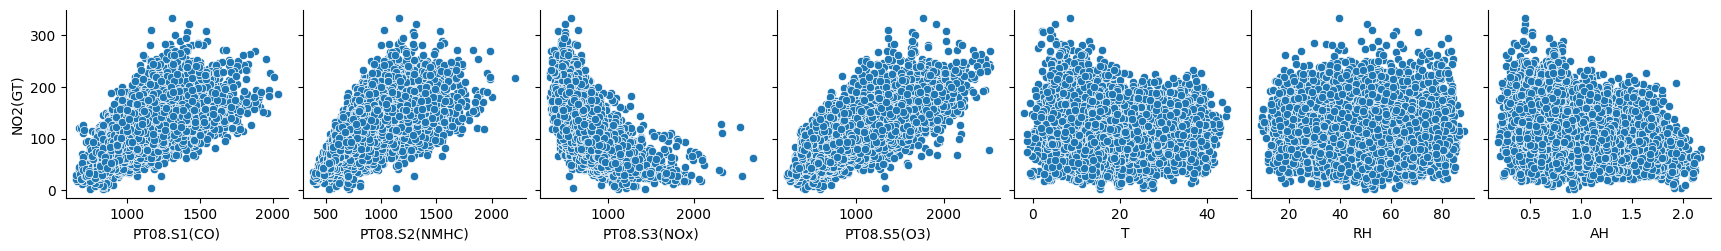

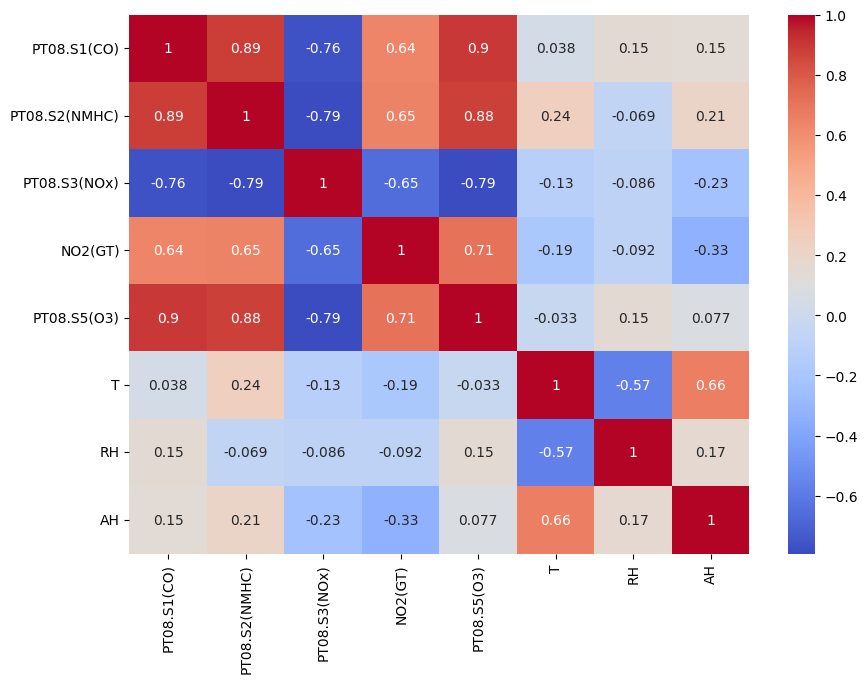

In [96]:
# Scatter plots
x = data_mean.drop(['NO2(GT)'], axis=1)
sns.pairplot(data, x_vars=x.columns, y_vars=['NO2(GT)']) # devo selezionare tutte le colonne tranne quella del no2

# Heat map
plt.figure(figsize=(10, 7))
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.show()

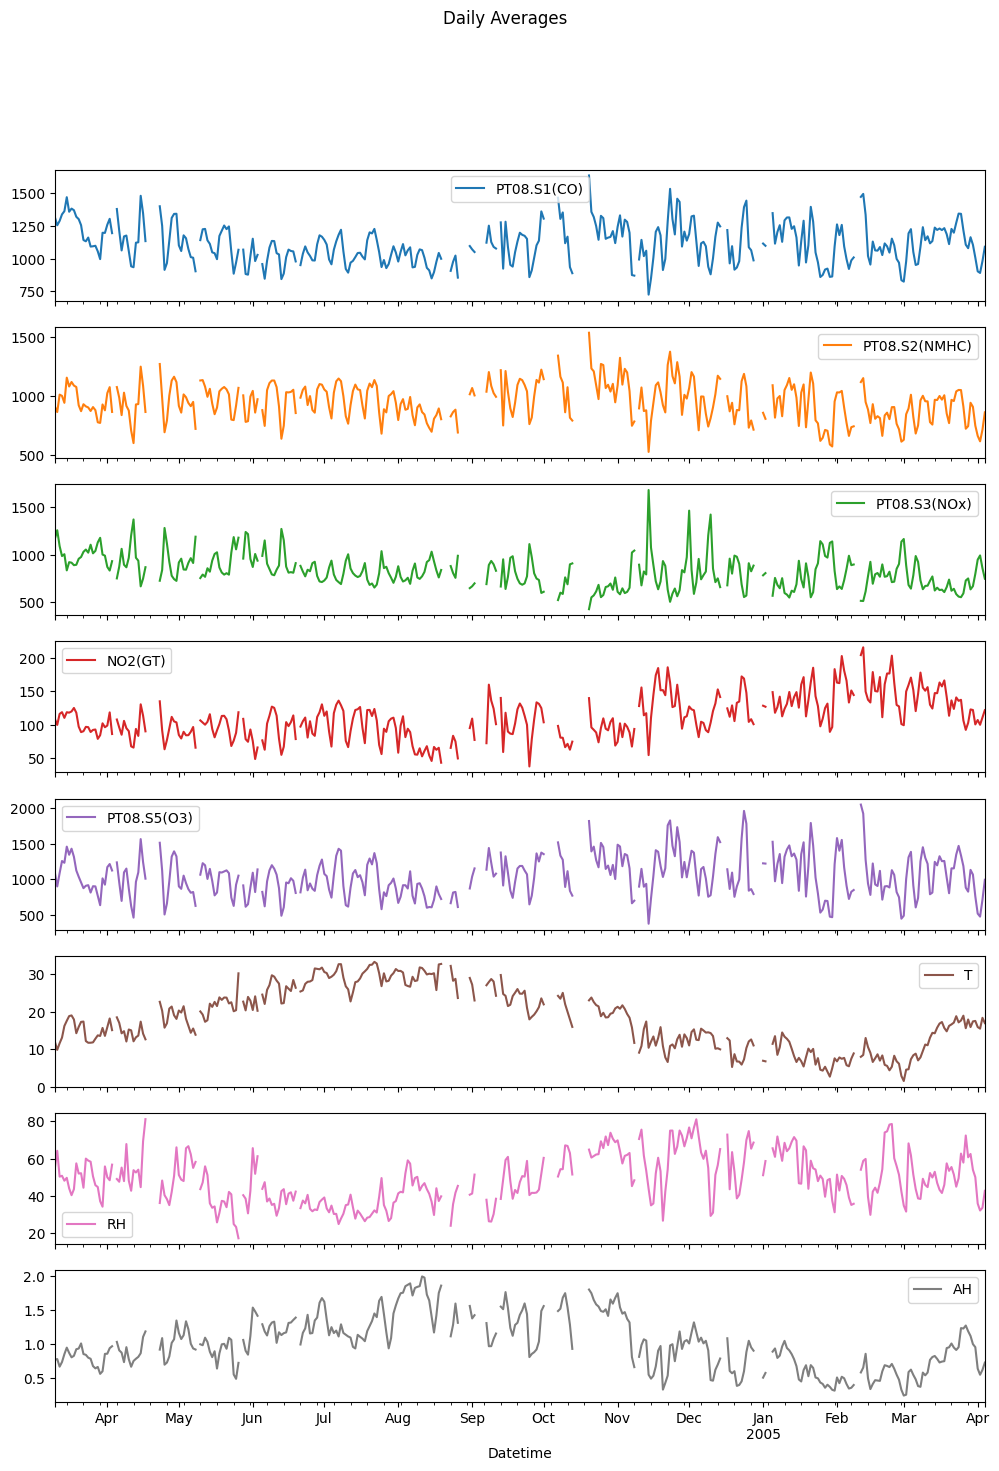

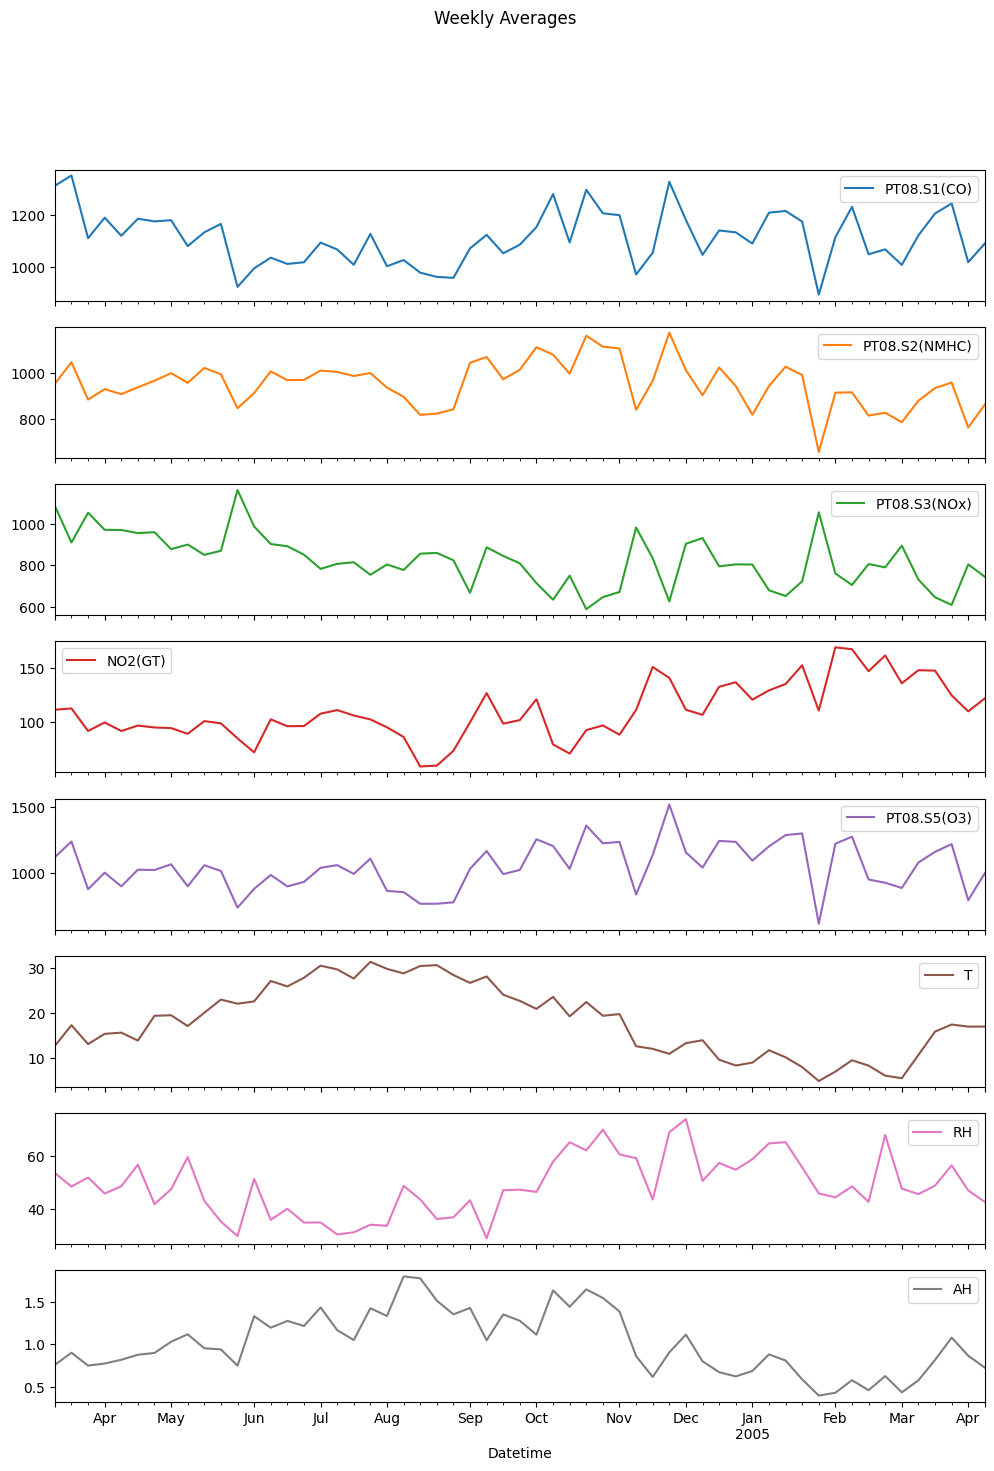

In [99]:
# Daily averages
daily_data = data_drop.resample('D').mean()

# Weekly averages
weekly_data = data_drop.resample('W').mean()

# Visualize the daily and weekly trends using line charts
daily_data.plot(subplots=True, figsize=(12, 16), title='Daily Averages')
weekly_data.plot(subplots=True, figsize=(12, 16), title='Weekly Averages')

# Visualize the daily and weekly trends using box plots
#daily_data.boxplot(figsize=(12, 16))
#plt.title('Daily Averages')
#weekly_data.boxplot(figsize=(12, 16))
#plt.title('Weekly Averages')

plt.show() # da capire perchè nel plot del weekly AH viene sempre 0

In [102]:
#Removing Outliers with the Interquartile Range Method (IQR)

Q1 = data_drop.quantile(0.25) #first 25% of the data
Q3 = data_drop.quantile(0.75) #first 75% of the data
IQR = Q3 - Q1 #IQR = InterQuartile Range

scale = 2 #For Normal Distributions, scale = 1.5
lower_lim = Q1 - scale*IQR
upper_lim = Q3 + scale*IQR

lower_outliers = (data_drop[data_drop.columns[2:13]] < lower_lim)
upper_outliers = (data_drop[data_drop.columns[2:13]] > upper_lim)


#Checking the resulting outliers calculated by the above method 
data_drop[data_drop.columns[2:13]][(lower_outliers | upper_outliers)].info()

#Create new DataFrame without the outliers

num_cols = list(data_drop.columns[2:13])
data_out_IQR = data_drop[~((data_drop[num_cols] < (Q1 - 2 * IQR)) |(data_drop[num_cols] > (Q3 + 2 * IQR))).any(axis=1)] 
data_out_IQR.info()

data.to_excel('data_dropoutIQR.xlsx', index=True)

<ipython-input-102-4dc29fa3e8ab>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_outliers = (data_drop[data_drop.columns[2:13]] < lower_lim)
<ipython-input-102-4dc29fa3e8ab>:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  upper_outliers = (data_drop[data_drop.columns[2:13]] > upper_lim)
<ipython-input-102-4dc29fa3e8ab>:21: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_out_IQR = data_drop[~((data_drop[num_cols] < (Q1 - 2 * IQR)) |(data_drop[num_cols] > (Q3 + 2 * 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7393 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PT08.S3(NOx)  106 non-null    float64
 1   NO2(GT)       28 non-null     float64
 2   PT08.S5(O3)   10 non-null     float64
 3   T             0 non-null      float64
 4   RH            0 non-null      float64
 5   AH            0 non-null      float64
dtypes: float64(6)
memory usage: 662.3 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7250 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PT08.S1(CO)    7250 non-null   float64
 1   PT08.S2(NMHC)  7250 non-null   float64
 2   PT08.S3(NOx)   7250 non-null   float64
 3   NO2(GT)        7250 non-null   float64
 4   PT08.S5(O3)    7250 non-null   float64
 5   T              72

In [113]:
#TODO: voglio i plot delle resistività medi (per ogni quantità) sulle ore per un giorno specifico 
# media della prima ora del lunedi , seconda ora e così via per per ogni quantità

#Adding a column with the week days 
#data_drop = data_drop.reset_index()

data_drop['Week days'] = data_drop['Datetime'].dt.day_name()
data_drop

#Rearranging columns

cols = data_drop.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:11]
data_drop = data_drop[cols]
data_drop.head(10)

,level_0,Week days,index,Datetime,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S5(O3),T,RH,AH
0,0,Wednesday,0,2004-03-10 18:00:00,1360.00,1045.50,1056.25,113.0,1267.50,13.600,48.875001,0.757754
1,1,Wednesday,1,2004-03-10 19:00:00,1292.25,954.75,1173.75,92.0,972.25,13.300,47.700000,0.725487
2,2,Wednesday,2,2004-03-10 20:00:00,1402.00,939.25,1140.00,114.0,1074.00,11.900,53.975000,0.750239
3,3,Wednesday,3,2004-03-10 21:00:00,1375.50,948.25,1092.00,122.0,1203.25,11.000,60.000000,0.786713
4,4,Wednesday,4,2004-03-10 22:00:00,1272.25,835.50,1205.00,116.0,1110.00,11.150,59.575001,0.788794
5,5,Wednesday,5,2004-03-10 23:00:00,1197.00,750.25,1336.50,96.0,949.25,11.175,59.175000,0.784772
6,6,Thursday,6,2004-03-11 00:00:00,1185.00,689.50,1461.75,77.0,732.50,11.325,56.775000,0.760312
7,7,Thursday,7,2004-03-11 01:00:00,1136.25,672.00,1453.25,76.0,729.50,10.675,60.000000,0.770238
8,8,Thursday,8,2004-03-11 02:00:00,1094.00,608.50,1579.00,60.0,619.50,10.650,59.674999,0.764819
9,9,Thursday,9,2004-03-11 04:00:00,1011.00,526.75,1817.50,34.0,445.25,10.075,60.474999,0.746495


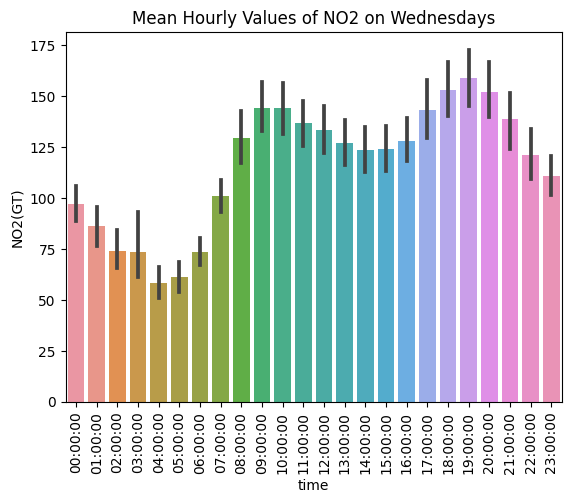

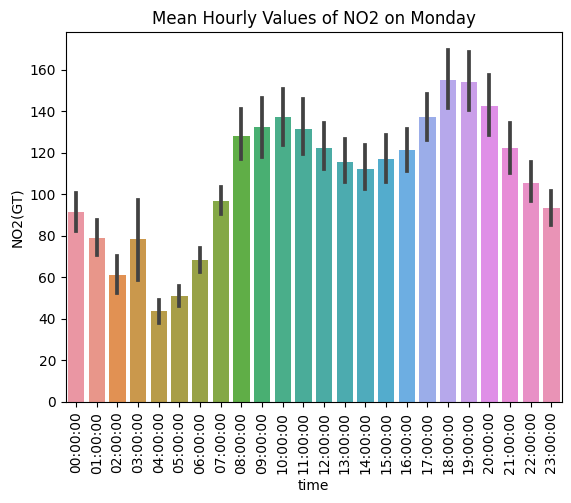

In [126]:
#Creating new dataframe with only wednesday/monday data

data_drop['Datetime'] = data_drop['Datetime'].astype(str)
data_drop[['day', 'time']] = data_drop['Datetime'].str.split(' ', expand=True)
data_drop

ar_mon = data_drop[data_drop['Week days'] == 'Monday']
ar_wed = data_drop[data_drop['Week days'] == 'Wednesday']


sns.barplot(x='time' ,y='NO2(GT)', data=ar_wed.sort_values('time'))
plt.title('Mean Hourly Values of NO2 on Wednesdays')
plt.xticks(rotation=90)
plt.show()

#Plotting the mean hourly value of CO on Wednesdays

sns.barplot(x='time' ,y='NO2(GT)', data=ar_mon.sort_values('time'))
plt.title('Mean Hourly Values of NO2 on Monday')
plt.xticks(rotation=90)
plt.show()
# impact on the temporality 